# Pankreopriver diabetes mellitus vs Diabetes Type 1 

## Upsetplot

### Libraries

In [1]:
# pd.options.display.max_columns= 999

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

In [5]:
from skbio.stats.ordination import pcoa

### Data loading

In [6]:
#df = pd.read_csv("/data/projects/2024/Effenberger-Diabetes/data/PDM merged 3.0_modified.csv")
df = pd.read_csv("/data/scratch/kvalem/projects/2024/diabetes_microbe/01-tables/PDM merged 3.0_modified.csv")

In [7]:
#sample_info = pd.read_csv("/data/projects/2024/Effenberger-Diabetes/data/20011/20011_SampleInfo.csv")
sample_info = pd.read_csv("/data/scratch/kvalem/projects/2024/diabetes_microbe/01-tables/20011_SampleInfo.csv")

In [8]:
df.rename(columns={"Probennummer": "sample_information"}, inplace=True)

In [9]:
sample_info.rename(columns={"SampleInformation": "sample_information"}, inplace=True)

In [10]:
df = df.merge(
    sample_info[["sample_information", "IMGM ID", "Type"]],
    on="sample_information",
    how="left",
)

In [11]:
#file_path = "/data/projects/2024/Effenberger-Diabetes/out/nf_core_ampliseq_003/qiime2/barplot/level-5.csv"
file_path = "/data/scratch/kvalem/projects/2024/diabetes_microbe/01-tables/level-5.csv"
df_tax = pd.read_csv(file_path)

In [12]:
cols_to_drop = [
    'BMI1','BMI2','BMI_diff',
    'CA1','CA2','CA_diff',
    'Glukose1','Glukose2','Glukose_diff',
    'HbA1C (DCCT/NGSP)1','HbA1C (DCCT/NGSP)2','HbA1C_diff',
    'KHK1','KHK2','KHK_diff',
    'Pankreatektomie',
    'age'
]

df_tax = df_tax.drop(columns=cols_to_drop, errors='ignore')

In [13]:
df_tax.columns

Index(['index',
       'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae',
       'Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;',
       'Bacteria;Firmicutes;Clostridia;Clostridia vadinBB60 group;',
       'Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Bacteroidaceae',
       'Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae',
       'Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Prevotellaceae',
       'Bacteria;Bacteroidota;Bacteroidia;;',
       'Bacteria;Firmicutes;Clostridia;Oscillospirales;[Eubacterium] coprostanoligenes group',
       'Bacteria;Verrucomicrobiota;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae',
       ...
       'Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Hafniaceae',
       'Bacteria;Cyanobacteria;Cyanobacteriia;;',
       'Bacteria;Verrucomicrobiota;Lentisphaeria;Victivallales;vadinBE97',
       'Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Aeromonadaceae',
       'Bacteria;Actinobacterio

### Plot

In [14]:



def extract_microbial_data(df, condition_label):
    subset = df[df["sample_information"].str.startswith(condition_label)]
    microbial_data = subset
    microbial_data = microbial_data.loc[:, (microbial_data != 0).any(axis=0)]
    microbial_data = microbial_data.loc[
        :, ~microbial_data.columns.str.startswith("Archaea;")
    ]
    return microbial_data



microbial_data_PDM = extract_microbial_data(df_tax, "PDM")
microbial_data_DM = extract_microbial_data(df_tax, "DM")
microbial_data_Kontrolle = extract_microbial_data(df_tax, "K")

In [15]:
list_PDM = set(microbial_data_PDM.columns)
list_DM = set(microbial_data_DM.columns)
list_Kontrolle = set(microbial_data_Kontrolle.columns)

In [16]:
common_PDM_DM = list_PDM & list_DM

In [17]:
notcommon_PDM_DM = list_PDM ^ list_DM

# Unique to PDM
unique_PDM = list_PDM - list_DM - list_Kontrolle

# Unique to DM
unique_DM = list_DM - list_PDM - list_Kontrolle

common_PDM_DM = sorted(list(common_PDM_DM))
unique_PDM = sorted(list(unique_PDM))
unique_DM = sorted(list(unique_DM))

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth

<Figure size 1000x600 with 0 Axes>

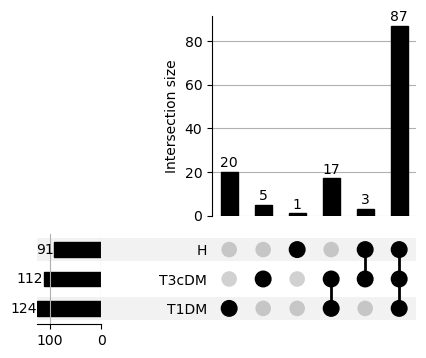

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import UpSet, from_memberships


taxa_T3cDM = set(microbial_data_PDM.columns)
taxa_T1DM = set(microbial_data_DM.columns)
taxa_H = set(microbial_data_Kontrolle.columns)

clinical_vars = {
    'BMI1','BMI2','BMI_diff',
    'CA1','CA2','CA_diff',
    'Glukose1','Glukose2','Glukose_diff',
    'HbA1C (DCCT/NGSP)1','HbA1C (DCCT/NGSP)2','HbA1C_diff',
    'KHK1','KHK2','KHK_diff',
    'Pankreatektomie',
    'age'
}


taxa_T3cDM.difference_update(clinical_vars)
taxa_T1DM.difference_update(clinical_vars)
taxa_H.difference_update(clinical_vars)


taxa_all = taxa_T3cDM | taxa_T1DM | taxa_H


memberships = []
for taxon in taxa_all:
    presence = []
    if taxon in taxa_T3cDM:
        presence.append("T3cDM")
    if taxon in taxa_T1DM:
        presence.append("T1DM")
    if taxon in taxa_H:
        presence.append("H")
    memberships.append(presence)


data = from_memberships(memberships)


plt.figure(figsize=(10, 6))
UpSet(data, subset_size="count", show_counts=True).plot()
plt.title("")
plt.tight_layout()
#plt.savefig("/data/scratch/kvalem/projects/2024/diabetes_microbe/05-results/figures/upsetplot.svg", dpi=300)
#plt.savefig("/data/scratch/kvalem/projects/2024/diabetes_microbe/05-results/figures/upsetplot.png", dpi=300)
plt.show()


shared_T3cDM_T1DM_only = (taxa_T3cDM & taxa_T1DM) - taxa_H
unique_T3cDM = taxa_T3cDM - taxa_T1DM - taxa_H
unique_T1DM = taxa_T1DM - taxa_T3cDM - taxa_H
unique_H = taxa_H - taxa_T1DM - taxa_T3cDM


In [19]:
shared_T3cDM_T1DM_only = (taxa_T3cDM & taxa_T1DM) - taxa_H
unique_T3cDM = taxa_T3cDM - taxa_T1DM - taxa_H
unique_T1DM = taxa_T1DM - taxa_T3cDM - taxa_H
unique_H = taxa_H - taxa_T1DM - taxa_T3cDM

In [20]:
groups = {
    "Shared_T3cDM_T1DM_only": shared_T3cDM_T1DM_only,
    "Unique_T3cDM": unique_T3cDM,
    "Unique_T1DM": unique_T1DM,
    "Unique_H": unique_H
}

def last_nonempty_rank(tax_string: str) :
    
    parts = [p.strip() for p in tax_string.split(';')]
    for token in reversed(parts):
        if token: 
            return token
    return "Unassigned"


rows = []
for grp, taxa in groups.items():
    for t in taxa:
        rows.append({"Group": grp, "Family": last_nonempty_rank(t)})

df_long = pd.DataFrame(rows).sort_values(["Group", "Family"]).reset_index(drop=True)


In [21]:
df_long

,Group,Family
0,Shared_T3cDM_T1DM_only,Aeromonadaceae
1,Shared_T3cDM_T1DM_only,Anaerovirgula
2,Shared_T3cDM_T1DM_only,Bacillales
3,Shared_T3cDM_T1DM_only,Comamonadaceae
4,Shared_T3cDM_T1DM_only,Cyclobacteriaceae
5,Shared_T3cDM_T1DM_only,Gemellaceae
6,Shared_T3cDM_T1DM_only,Micrococcaceae
7,Shared_T3cDM_T1DM_only,Negativicutes
8,Shared_T3cDM_T1DM_only,Oxalobacteraceae
9,Shared_T3cDM_T1DM_only,Pectobacteriaceae


In [22]:
df_long.to_csv("../01-tables/upsetplot_family.csv")

/tmp/ipykernel_1678096/582270756.py:37: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_rel_family = df_rel.groupby(level=0, axis=1).sum()


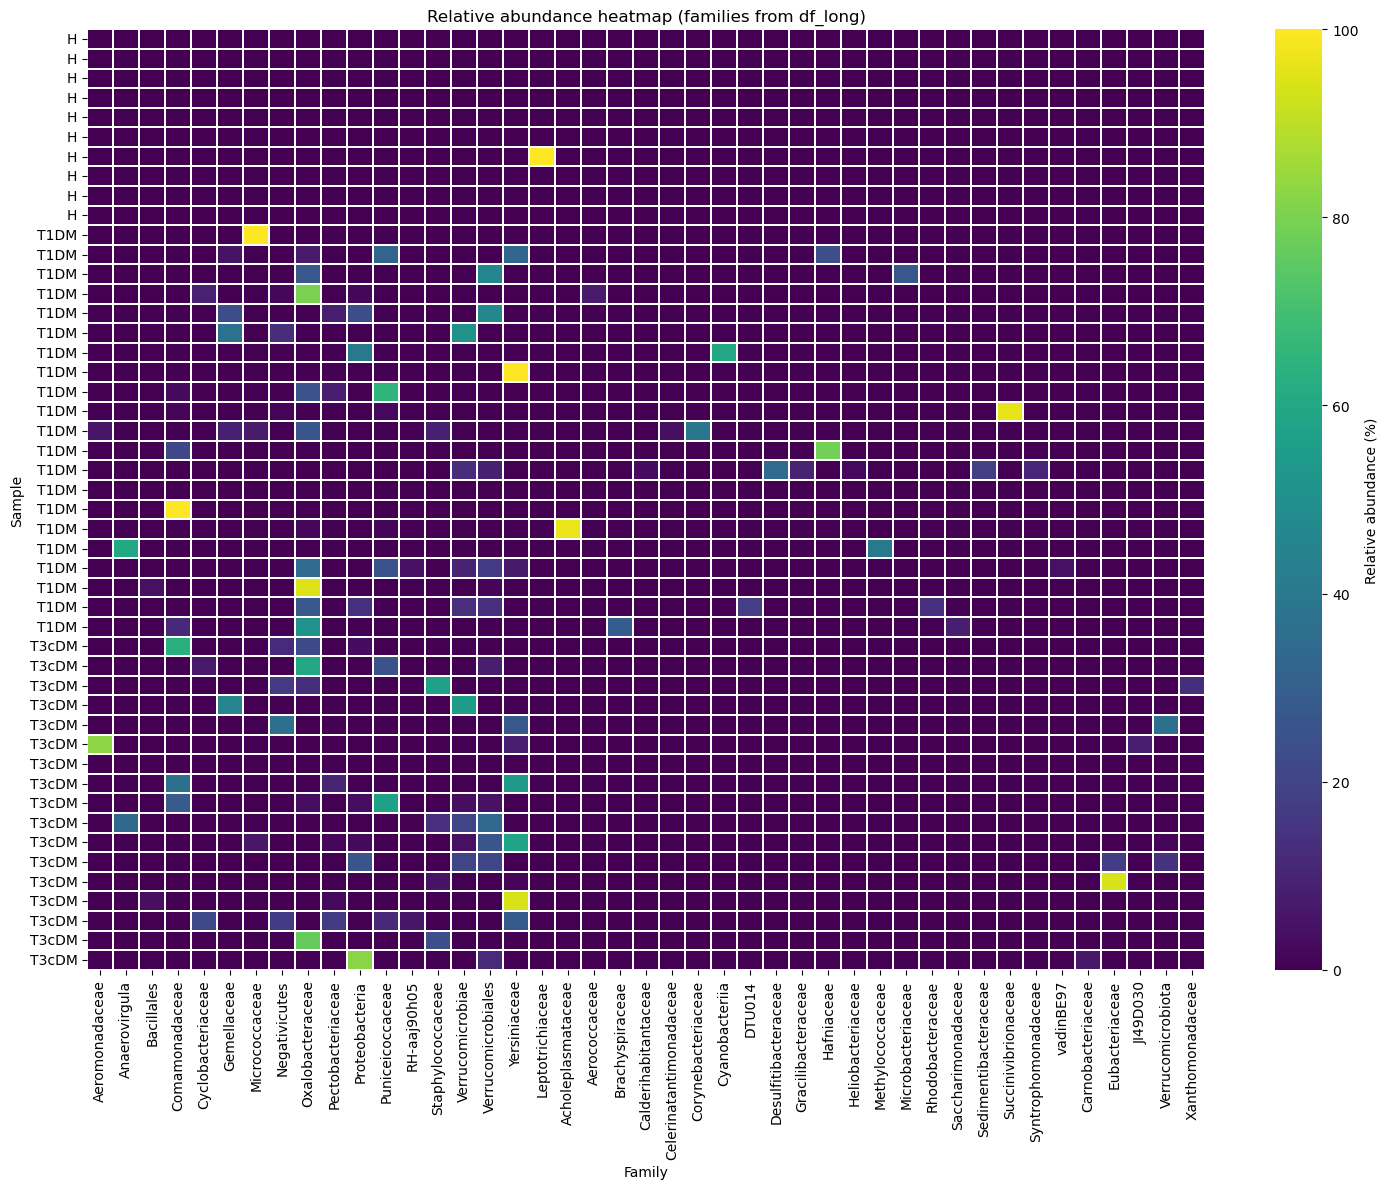

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- helper ---
def last_nonempty_rank(tax_string: str) -> str:
    parts = [p.strip() for p in str(tax_string).split(';')]
    for token in reversed(parts):
        if token:
            return token
    return "Unassigned"

# --- inputs ---
# df_tax: rows = samples, columns = features with taxonomy strings like
#         "Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae"
# df_long: must contain a column "Family" (already cleaned) listing the families you care about

# 1) families to keep (preserve the order present in df_long if you want)
families_list = [f for f in df_long["Family"].dropna().astype(str)]
families_set = set(families_list)

# 2) map each df_tax column to its terminal rank (family here)
col_to_family = {col: last_nonempty_rank(col) for col in df_tax.columns}

# 3) keep only columns whose mapped family is in your df_long["Family"]
cols_keep = [c for c in df_tax.columns if col_to_family[c] in families_set]
df_tax_sel = df_tax[cols_keep].copy()

# 4) convert to relative abundance per sample (row-wise)
df_rel = df_tax_sel.div(df_tax_sel.sum(axis=1), axis=0).fillna(0)

# 5) aggregate features that map to the same family
#    (multiple ASVs/OTUs per family will be summed)
family_index = pd.Index([col_to_family[c] for c in df_rel.columns], name="Family")
df_rel.columns = family_index
df_rel_family = df_rel.groupby(level=0, axis=1).sum()

# 6) reindex columns to the order in df_long (and drop any families not present after aggregation)
df_rel_family = df_rel_family.loc[:, [f for f in families_list if f in df_rel_family.columns]]

# OPTIONAL: scale to percentages
df_rel_family_pct = df_rel_family * 100

# 7) plot heatmap
plt.figure(figsize=(max(8, 0.35*len(df_rel_family_pct.columns)), max(6, 0.25*len(df_rel_family_pct))))
df_tax["Type"] = df_tax["sample_information"].apply(
    lambda x: "H" if str(x).startswith("K")
    else ("T3cDM" if str(x).startswith("PDM") else "T1DM")
)
order = ["H", "T1DM", "T3cDM"]

df_ordered = df_rel_family_pct.loc[
    df_tax.sort_values(
        "Type", key=lambda col: pd.Categorical(col, categories=order, ordered=True)
    ).index
]

df_ordered.index = df_tax.loc[df_ordered.index, "Type"]
sns.heatmap(
    df_ordered,
    cmap="viridis",
    cbar_kws={"label": "Relative abundance (%)"},
    linewidths=0.2
)
plt.xlabel("Family")
plt.ylabel("Sample")
plt.title("Relative abundance heatmap (families from df_long)")
plt.tight_layout()
plt.show()

In [47]:
df_ordered

Family,Aeromonadaceae,Anaerovirgula,Bacillales,Comamonadaceae,Cyclobacteriaceae,Gemellaceae,Micrococcaceae,Negativicutes,Oxalobacteraceae,Pectobacteriaceae,...,Saccharimonadaceae,Sedimentibacteraceae,Succinivibrionaceae,Syntrophomonadaceae,vadinBE97,Carnobacteriaceae,Eubacteriaceae,JI49D030,Verrucomicrobiota,Xanthomonadaceae
index,,,,,,,,,,,,,,,,,,,,,
s20011_0001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
s20011_0006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
